In [8]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import os

from PIL import Image

from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform

## Don't forget to run feature extraction before running this script
```python extract_features.py --image_list_file image_list_qualitative.txt```

### Change the pair index here (possible values: 1, 2 or 3)

In [9]:
pair_idxes = [1, 2, 3]

### Loading the features

In [10]:
pair_pathes = []
for pair_idx in pair_idxes:
    pair_path = os.path.join('images', 'pair_%d' % pair_idx)
    pair_pathes.append(pair_path)
methods = ['fr2d2','fr2d2f0','hardnet', 'hardnetf0','hardnetdice','czk','dice','jac','sqc']


In [11]:
image1s = []
image2s = []
feat1s = []
feat2s = []

for pair_path in pair_pathes:
    for method in methods:
        image1 = np.array(Image.open(os.path.join(pair_path, '1.jpg')))
        image2 = np.array(Image.open(os.path.join(pair_path, '2.jpg')))
        image1s.append(image1)
        image2s.append(image2)

        feat1 = np.load(os.path.join(pair_path, '1.jpg.'+method)) # d2-net
        feat2 = np.load(os.path.join(pair_path, '2.jpg.'+method)) # d2-net
        feat1s.append(feat1)
        feat2s.append(feat2)

### Mutual nearest neighbors matching

### Homography fitting

In [12]:
image3s = []

for image1, image2, feat1, feat2 in zip(image1s, image2s, feat1s, feat2s):

    # Mutual nearest neighbor matching
    matches = match_descriptors(feat1['descriptors'], feat2['descriptors'], cross_check=True)
    print('Number of raw matches: %d.' % matches.shape[0])

    # Homography fitting
    keypoints_left = feat1['keypoints'][matches[:, 0], : 2]
    keypoints_right = feat2['keypoints'][matches[:, 1], : 2]
    np.random.seed(0)
    model, inliers = ransac(
        (keypoints_left, keypoints_right),
        ProjectiveTransform, min_samples=4,
        residual_threshold=4, max_trials=10000
    )
    n_inliers = np.sum(inliers)
    print('Number of inliers: %d.' % n_inliers)

    inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_left[inliers]]
    inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in keypoints_right[inliers]]
    placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
    image3 = cv2.drawMatches(image1, inlier_keypoints_left, image2, inlier_keypoints_right, placeholder_matches, None)
    image3s.append(image3)

Number of raw matches: 85.
Number of inliers: 8.
Number of raw matches: 39.
Number of inliers: 6.
Number of raw matches: 91.
Number of inliers: 7.
Number of raw matches: 63.
Number of inliers: 6.
Number of raw matches: 80.
Number of inliers: 6.
Number of raw matches: 63.
Number of inliers: 8.
Number of raw matches: 73.
Number of inliers: 7.
Number of raw matches: 52.
Number of inliers: 7.
Number of raw matches: 1071.
Number of inliers: 17.
Number of raw matches: 398.
Number of inliers: 222.
Number of raw matches: 370.
Number of inliers: 232.
Number of raw matches: 404.
Number of inliers: 248.
Number of raw matches: 356.
Number of inliers: 254.
Number of raw matches: 452.
Number of inliers: 251.
Number of raw matches: 370.
Number of inliers: 207.
Number of raw matches: 342.
Number of inliers: 195.
Number of raw matches: 395.
Number of inliers: 204.
Number of raw matches: 793.
Number of inliers: 278.
Number of raw matches: 114.
Number of inliers: 15.
Number of raw matches: 82.
Number of 

### Plotting

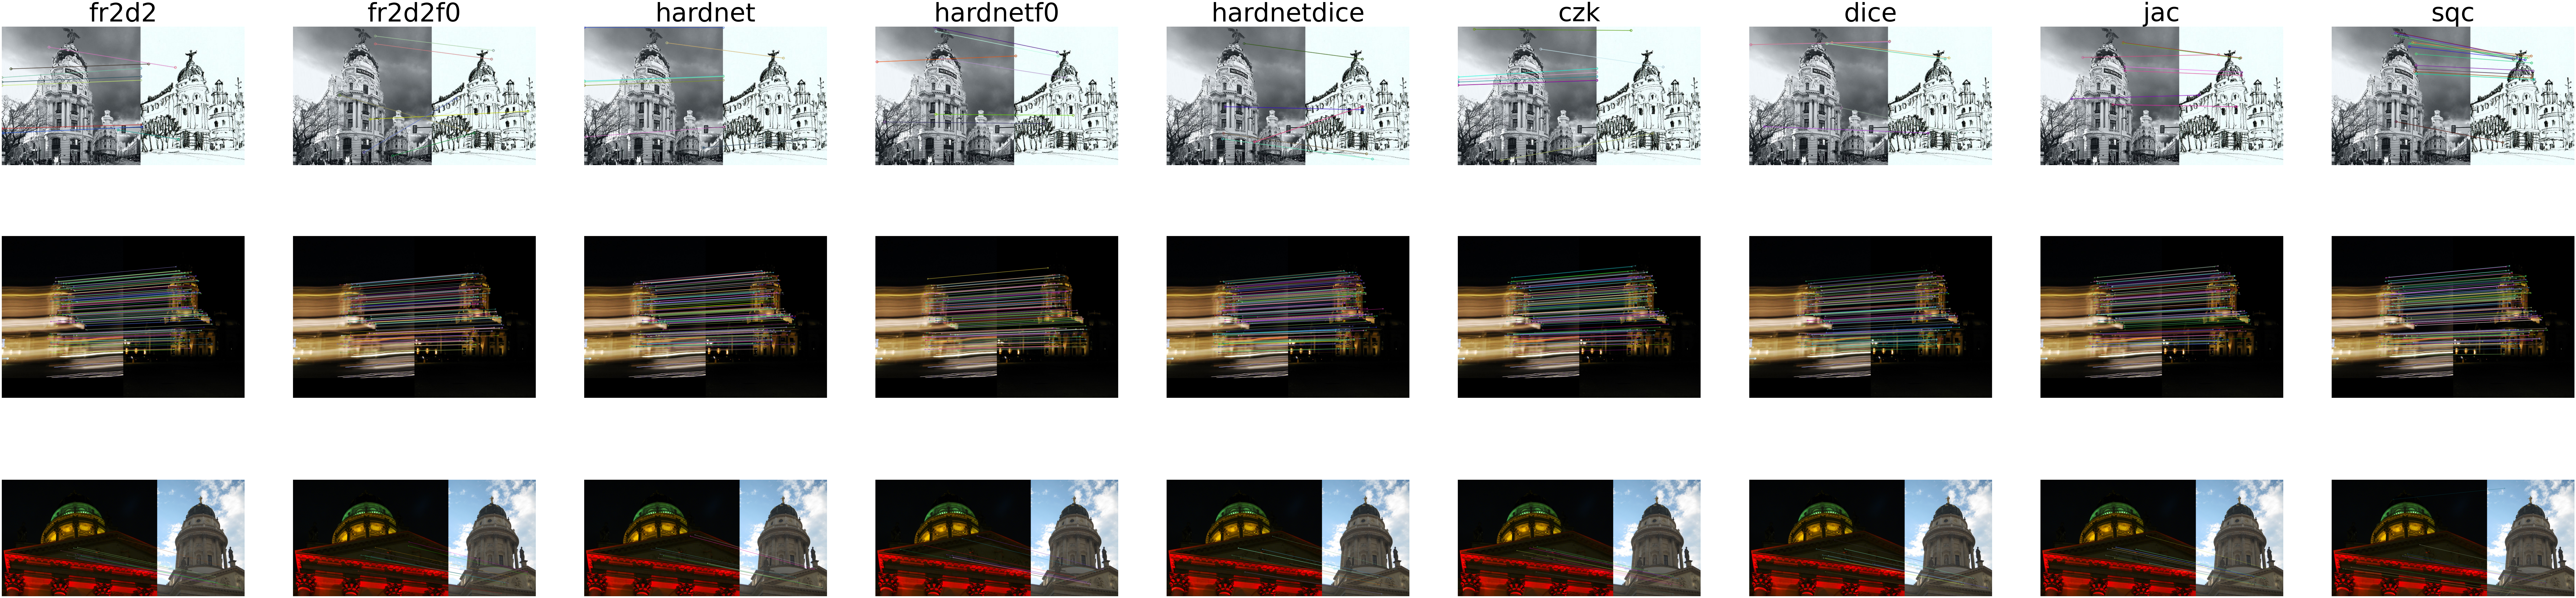

In [22]:
plt.figure(figsize=(180, 45))
for i, image3 in enumerate(image3s):
    if i<=9:
        plt.title(methods[i-1],fontsize=100)
    plt.subplot(3, 9, i + 1)
    plt.imshow(image3)
    plt.axis('off')

plt.show()